In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.width',500)
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

In [4]:
telecom_churn_data=pd.read_csv(r'train.csv')

In [5]:
telecom_churn_data.shape

(69999, 172)

In [6]:
telecom_churn_data.head(10)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.00,0.00,0.00,0.00,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.00,0.00,0.00,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.00,0.00,0.00,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,

In [9]:
missing_columns = telecom_churn_data.columns[telecom_churn_data.isnull().any()]
print("Columns with missing values:", missing_columns)

Columns with missing values: Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_7', 'last_date_of_month_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       ...
       'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8'], dtype='object', length=125)


In [10]:
#imputing missing values to zero
zero_impute_cols=['total_rech_data_6','total_rech_data_7','total_rech_data_8','max_rech_data_6','max_rech_data_7','max_rech_data_8','count_rech_2g_6',
                  'count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8',
                  'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']

In [11]:
telecom_churn_data[zero_impute_cols]=telecom_churn_data[zero_impute_cols].apply(lambda x: x.fillna(0))

In [12]:
percentage_missing=(telecom_churn_data.isnull().sum()/telecom_churn_data.shape[0])*100
percentage_missing

id                           0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.002871
std_og_t2o_mou               1.002871
loc_ic_t2o_mou               1.002871
last_date_of_month_6         0.000000
last_date_of_month_7         0.570008
last_date_of_month_8         1.047158
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_m

In [13]:
percentage_missing=percentage_missing[percentage_missing.values>=40]

In [14]:
cols_to_remove=list(percentage_missing.index)
telecom_churn_data.drop(columns=cols_to_remove,inplace=True)

In [15]:
cols_to_remove

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

In [16]:
telecom_churn_data.shape

(69999, 157)

In [17]:
telecom_churn_data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 157 columns):
 #    Column                Dtype  
---   ------                -----  
 0    id                    int64  
 1    circle_id             int64  
 2    loc_og_t2o_mou        float64
 3    std_og_t2o_mou        float64
 4    loc_ic_t2o_mou        float64
 5    last_date_of_month_6  object 
 6    last_date_of_month_7  object 
 7    last_date_of_month_8  object 
 8    arpu_6                float64
 9    arpu_7                float64
 10   arpu_8                float64
 11   onnet_mou_6           float64
 12   onnet_mou_7           float64
 13   onnet_mou_8           float64
 14   offnet_mou_6          float64
 15   offnet_mou_7          float64
 16   offnet_mou_8          float64
 17   roam_ic_mou_6         float64
 18   roam_ic_mou_7         float64
 19   roam_ic_mou_8         float64
 20   roam_og_mou_6         float64
 21   roam_og_mou_7         float64
 22   roam_og_mou_8       

In [18]:
#removing date and id columns
date_id_col=[]
for i in telecom_churn_data.columns:
    if ('date' in i) or ('id' in i):
        date_id_col.append(i)
telecom_churn_data.drop(columns=date_id_col,inplace=True)

In [19]:
telecom_churn_data.shape

(69999, 149)

In [20]:
telecom_churn_data.nunique()

loc_og_t2o_mou            1
std_og_t2o_mou            1
loc_ic_t2o_mou            1
arpu_6                61615
arpu_7                61425
arpu_8                60194
onnet_mou_6           20057
onnet_mou_7           20076
onnet_mou_8           19725
offnet_mou_6          26254
offnet_mou_7          26139
offnet_mou_8          25995
roam_ic_mou_6          5306
roam_ic_mou_7          4240
roam_ic_mou_8          4252
roam_og_mou_6          6568
roam_og_mou_7          5305
roam_og_mou_8          5215
loc_og_t2t_mou_6      11491
loc_og_t2t_mou_7      11359
loc_og_t2t_mou_8      11296
loc_og_t2m_mou_6      17848
loc_og_t2m_mou_7      17641
loc_og_t2m_mou_8      17616
loc_og_t2f_mou_6       3376
loc_og_t2f_mou_7       3365
loc_og_t2f_mou_8       3311
loc_og_t2c_mou_6       1945
loc_og_t2c_mou_7       2103
loc_og_t2c_mou_8       2204
loc_og_mou_6          22309
loc_og_mou_7          22012
loc_og_mou_8          21950
std_og_t2t_mou_6      14554
std_og_t2t_mou_7      14745
std_og_t2t_mou_8    

In [21]:
col_single_value=['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']
telecom_churn_data.drop(columns=col_single_value,inplace=True)

In [22]:
telecom_churn_data.shape

(69999, 140)

In [23]:
#imputing the missing values with median value
missed_cols=telecom_churn_data.columns[telecom_churn_data.isnull().sum()>0]
for i in missed_cols:
    telecom_churn_data[i].fillna((telecom_churn_data[i].median()),inplace=True)

In [24]:
(telecom_churn_data.isnull().sum()/telecom_churn_data.shape[0])*100

arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_mou_8      0.0
std_og_t2f_mou_6      0.0
std_og_t2f_mou_7      0.0
std_og_t2f_m

In [25]:
#selecting high value customers
telecom_churn_data['total_av_rech_data_amt_6']=(telecom_churn_data['count_rech_2g_6']+telecom_churn_data['count_rech_3g_6'])*telecom_churn_data['av_rech_amt_data_6']
telecom_churn_data['total_av_rech_data_amt_7']=(telecom_churn_data['count_rech_3g_7']+telecom_churn_data['count_rech_3g_7'])*telecom_churn_data['av_rech_amt_data_7']

telecom_churn_data['total_av_rech_num_6']=(telecom_churn_data['total_rech_amt_6']+telecom_churn_data['total_av_rech_data_amt_6'])
telecom_churn_data['total_av_rech_num_7']=(telecom_churn_data['total_rech_amt_7']+telecom_churn_data['total_av_rech_data_amt_7'])
telecom_churn_data['total_av_rech_num_6_7']=(telecom_churn_data['total_av_rech_num_6']+telecom_churn_data['total_av_rech_num_7'])/2

#removing total_rech_amt_6 and total_rech_num_7
telecom_churn_data.drop(columns=['total_rech_num_6','total_rech_num_7','total_av_rech_data_amt_6','total_av_rech_data_amt_7','total_av_rech_num_6','total_av_rech_num_7'])

hvc_telecom_churn_data=telecom_churn_data[telecom_churn_data['total_av_rech_num_6_7']>telecom_churn_data['total_av_rech_num_6_7'].quantile(0.7)]

In [26]:
hvc_telecom_churn_data.shape

(20980, 145)

In [27]:
telecom_churn_data['total_av_rech_num_6_7'].quantile(0.7)

449.0

In [28]:
#Deriving new features and seeing the difference between good and action phase

hvc_telecom_churn_data['loc_og_mou_diff']=hvc_telecom_churn_data['loc_og_mou_8']-(telecom_churn_data['loc_og_mou_6']+telecom_churn_data['loc_og_mou_7'])/2
hvc_telecom_churn_data['total_og_mou_diff']=hvc_telecom_churn_data['total_og_mou_8']-(telecom_churn_data['total_og_mou_6']+telecom_churn_data['total_og_mou_7'])/2
hvc_telecom_churn_data['total_rech_amt_diff']=hvc_telecom_churn_data['total_rech_amt_8']-(telecom_churn_data['total_rech_amt_6']+telecom_churn_data['total_rech_amt_7'])/2
hvc_telecom_churn_data['total_rech_data_diff']=hvc_telecom_churn_data['total_rech_data_8']-(telecom_churn_data['total_rech_data_6']+telecom_churn_data['total_rech_data_7'])/2

In [29]:
hvc_telecom_churn_data['loc_og_mou_diff'].describe()

count    20980.000000
mean       -18.760326
std        209.687625
min      -3270.400000
25%        -59.512500
50%         -4.622500
75%         33.377500
max       4619.975000
Name: loc_og_mou_diff, dtype: float64

In [30]:
hvc_telecom_churn_data['total_og_mou_diff'].describe()

count    20980.000000
mean       -70.841653
std        507.479752
min      -7213.410000
25%       -181.085000
50%        -16.507500
75%         72.891250
max      12768.705000
Name: total_og_mou_diff, dtype: float64

In [31]:
hvc_telecom_churn_data['total_rech_amt_diff'].describe()

count    20980.000000
mean       -79.179290
std        421.157028
min      -6950.000000
25%       -252.000000
50%        -61.500000
75%        100.000000
max      14344.500000
Name: total_rech_amt_diff, dtype: float64

In [32]:
hvc_telecom_churn_data['total_rech_data_diff'].describe()

count    20980.000000
mean        -0.128384
std          2.094051
min        -30.500000
25%         -0.500000
50%          0.000000
75%          0.000000
max         41.000000
Name: total_rech_data_diff, dtype: float64

## EDA 

In [33]:
def univariate(f,x,y,z):
    plt.figure(figsize=(18,12))
    plt.subplot(3,3,1)
    sns.distplot(f[x])

    plt.subplot(3,3,2)
    sns.distplot(f[y])

    plt.subplot(3,3,3)
    sns.distplot(f[z])

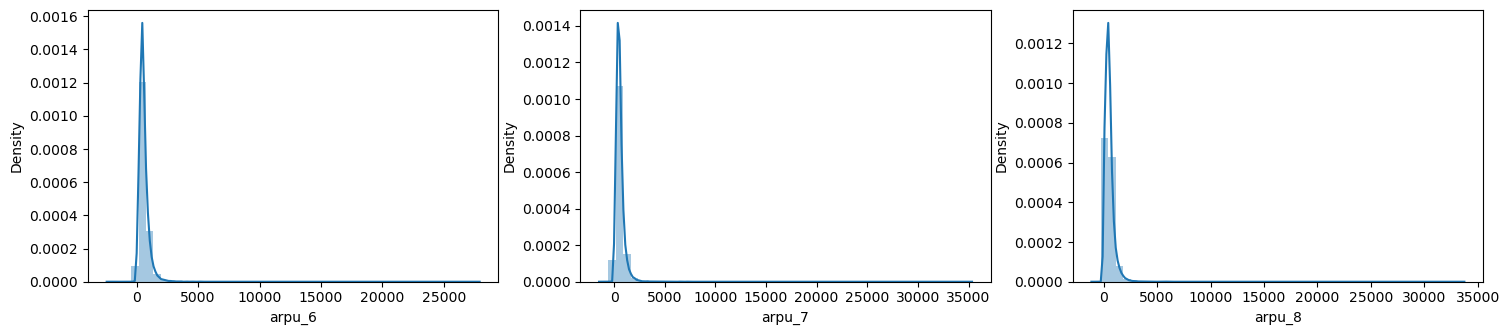

In [34]:
univariate(hvc_telecom_churn_data,'arpu_6','arpu_7','arpu_8')

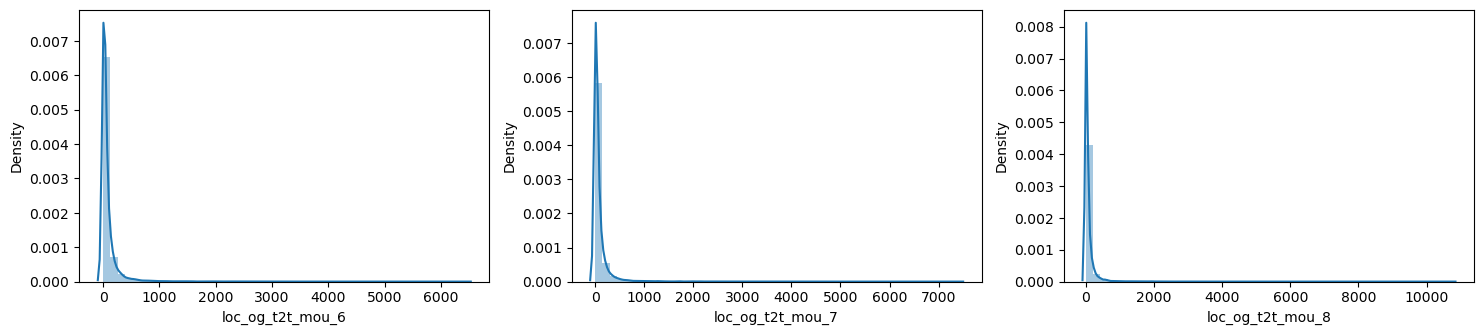

In [35]:
univariate(hvc_telecom_churn_data,'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8')

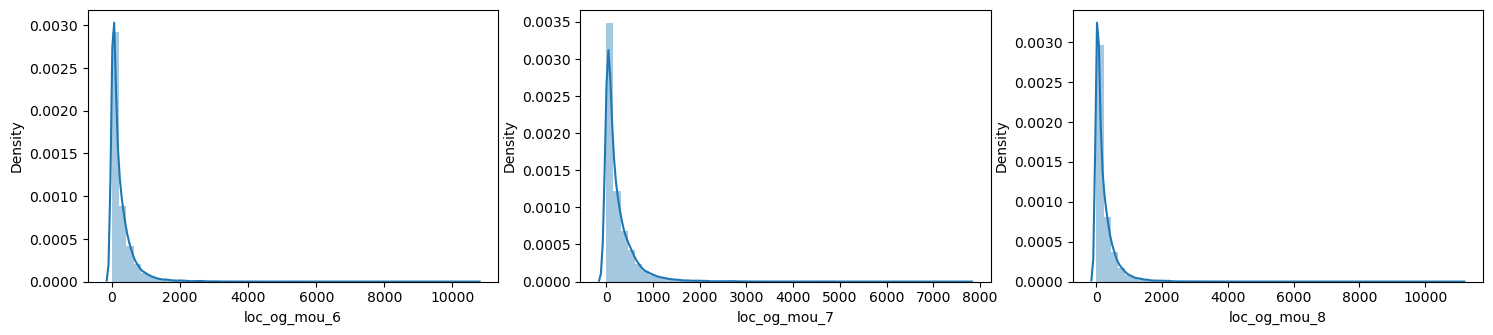

In [36]:
univariate(hvc_telecom_churn_data,'loc_og_mou_6','loc_og_mou_7','loc_og_mou_8')

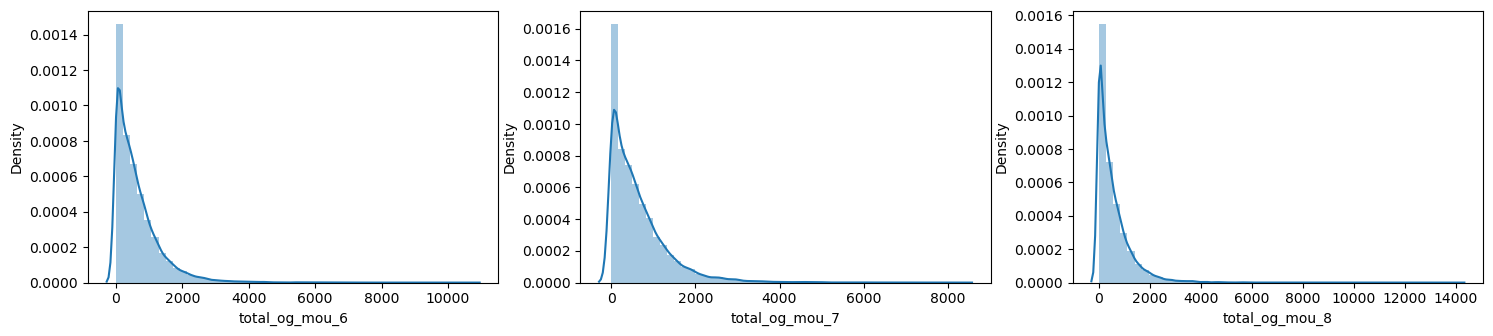

In [37]:
univariate(hvc_telecom_churn_data,'total_og_mou_6','total_og_mou_7','total_og_mou_8')

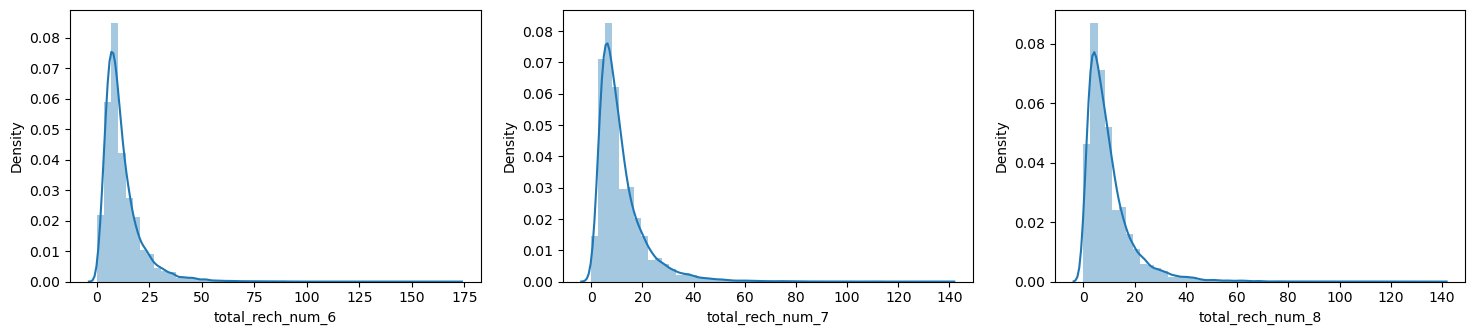

In [38]:
univariate(hvc_telecom_churn_data,'total_rech_num_6','total_rech_num_7','total_rech_num_8')

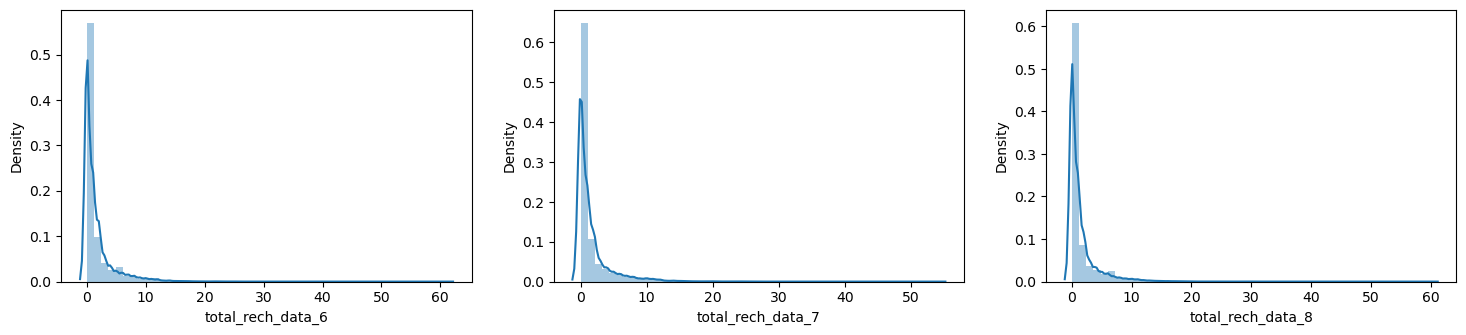

In [39]:
univariate(hvc_telecom_churn_data,'total_rech_data_6','total_rech_data_7','total_rech_data_8')

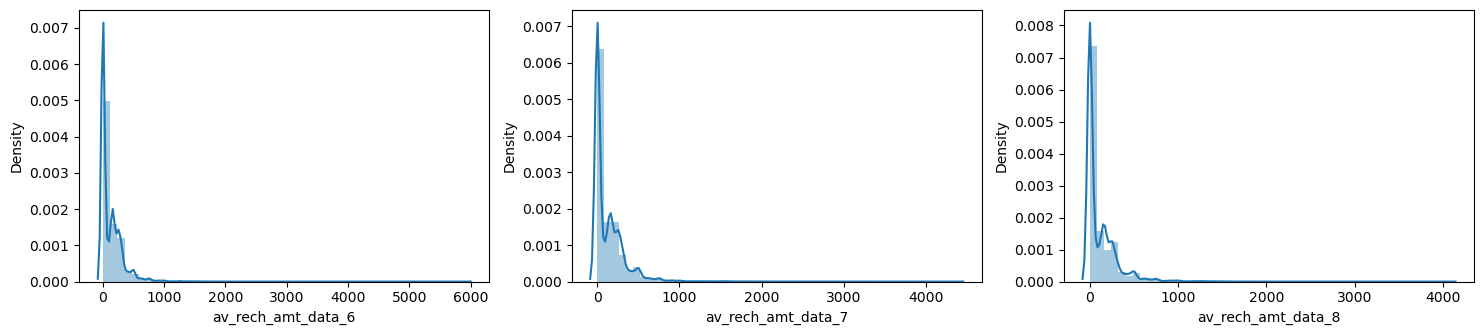

In [37]:
univariate(hvc_telecom_churn_data,'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8')

In [40]:
def bivariate(f,a,b,c):
    plt.figure(figsize=[18,12])
    plt.subplot(3,3,1)
    sns.barplot(x='churn_probability',y=a,data=f)
    
    plt.subplot(3,3,2)
    sns.barplot(x='churn_probability',y=b,data=f)
    
    plt.subplot(3,3,3)
    sns.barplot(x='churn_probability',y=c,data=f)


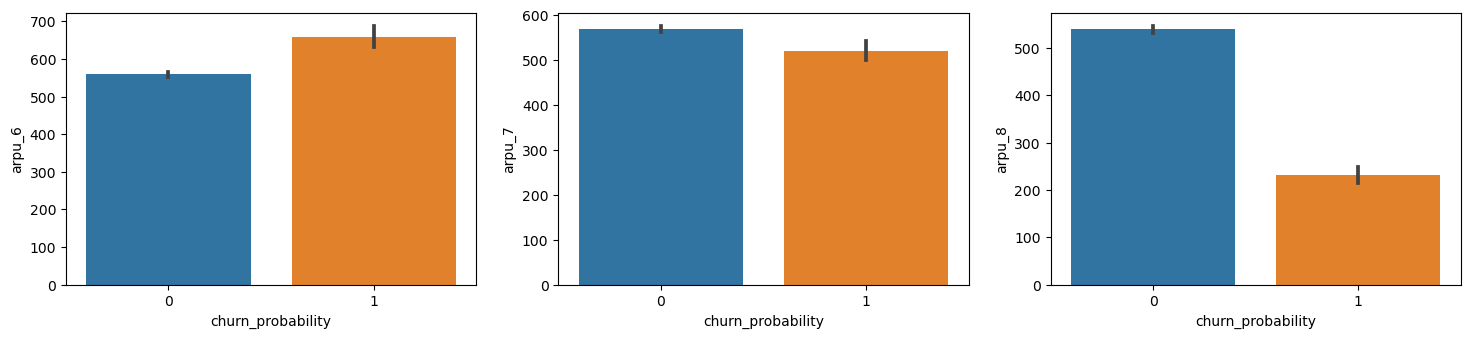

In [41]:
bivariate(hvc_telecom_churn_data,'arpu_6','arpu_7','arpu_8')

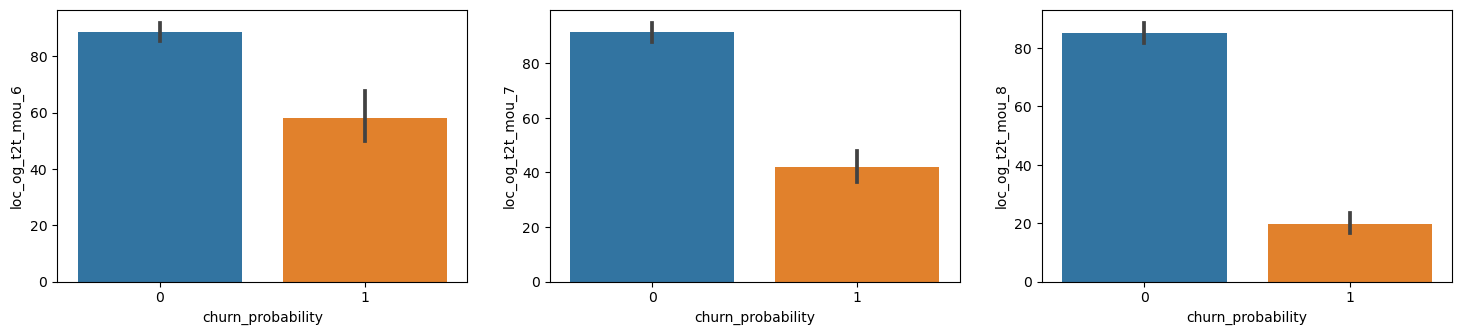

In [42]:
bivariate(hvc_telecom_churn_data,'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8')


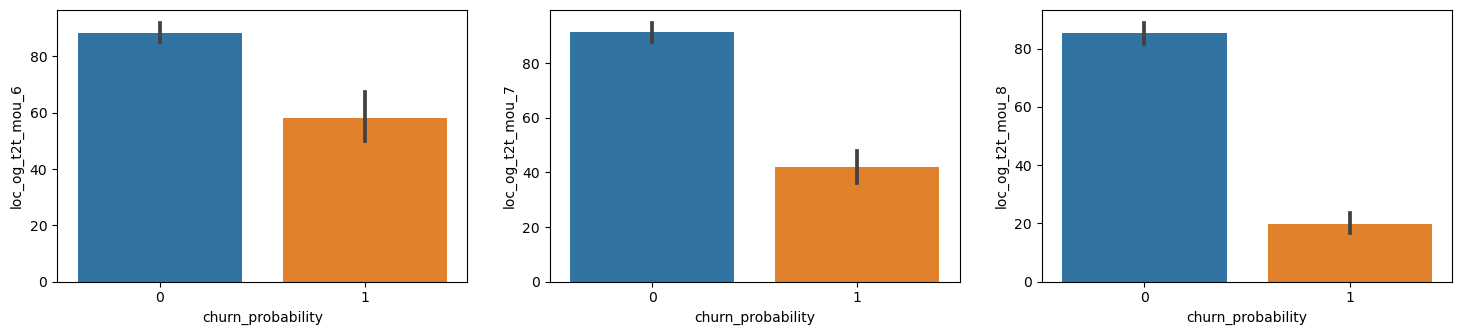

In [43]:
bivariate(hvc_telecom_churn_data,'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8')

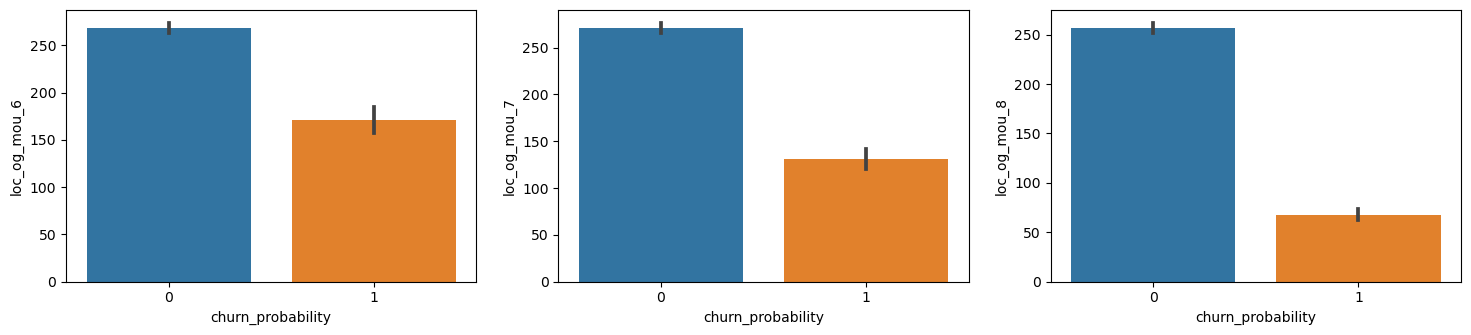

In [44]:
bivariate(hvc_telecom_churn_data,'loc_og_mou_6','loc_og_mou_7','loc_og_mou_8')

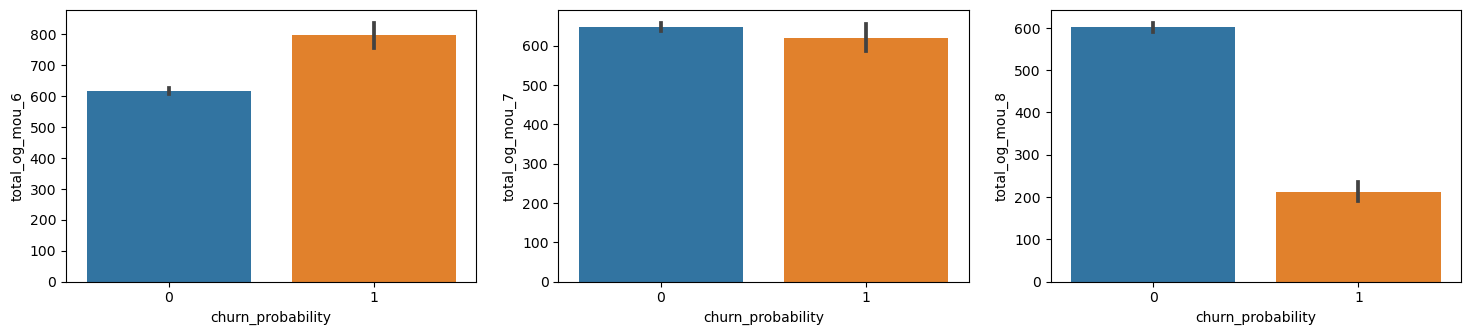

In [45]:
bivariate(hvc_telecom_churn_data,'total_og_mou_6','total_og_mou_7','total_og_mou_8')


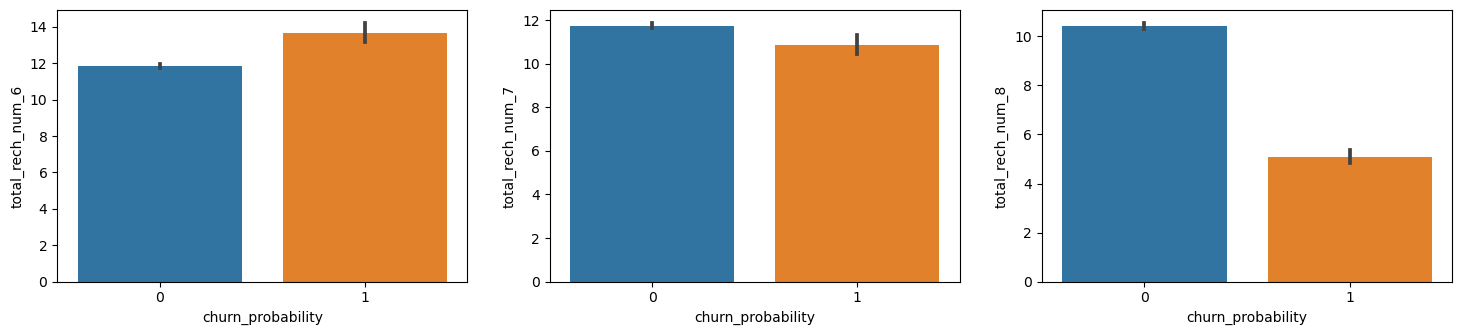

In [46]:
bivariate(hvc_telecom_churn_data,'total_rech_num_6','total_rech_num_7','total_rech_num_8')


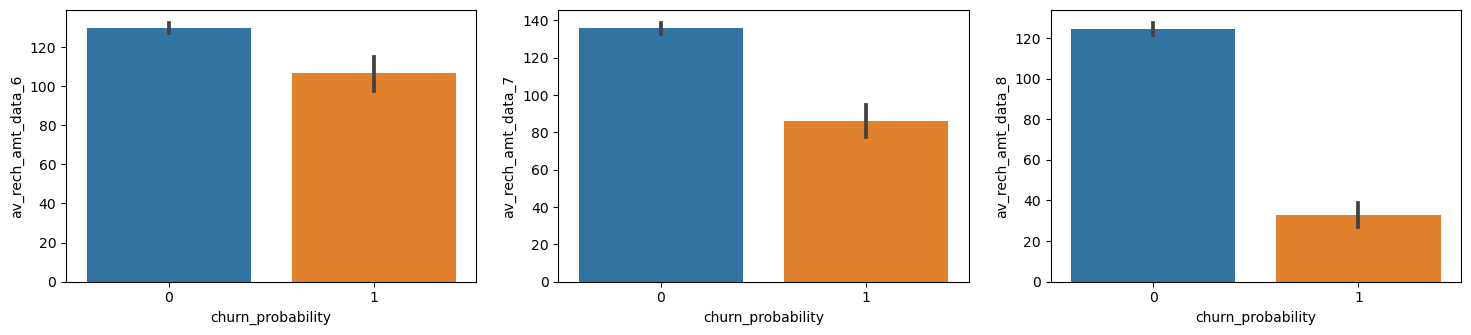

In [47]:
bivariate(hvc_telecom_churn_data,'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8')


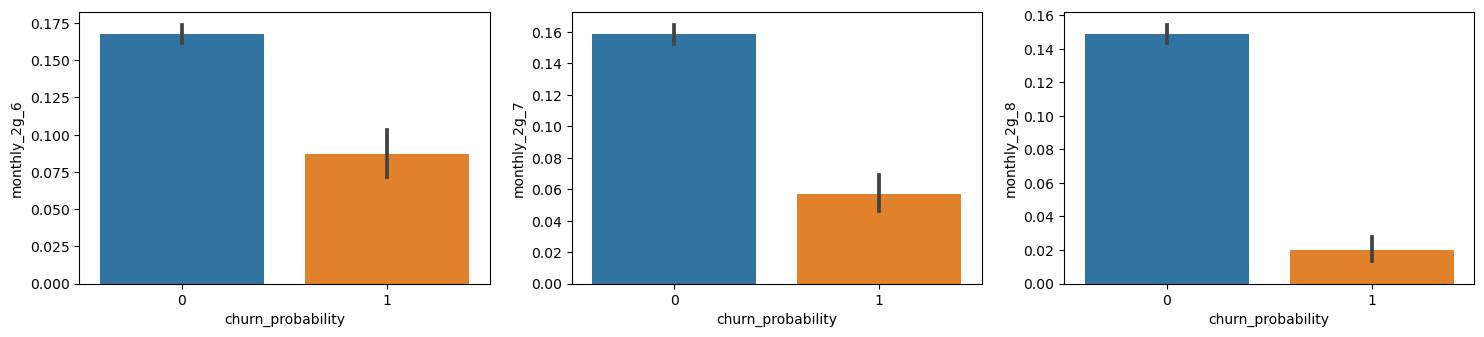

In [48]:
bivariate(hvc_telecom_churn_data,'monthly_2g_6','monthly_2g_7','monthly_2g_8')


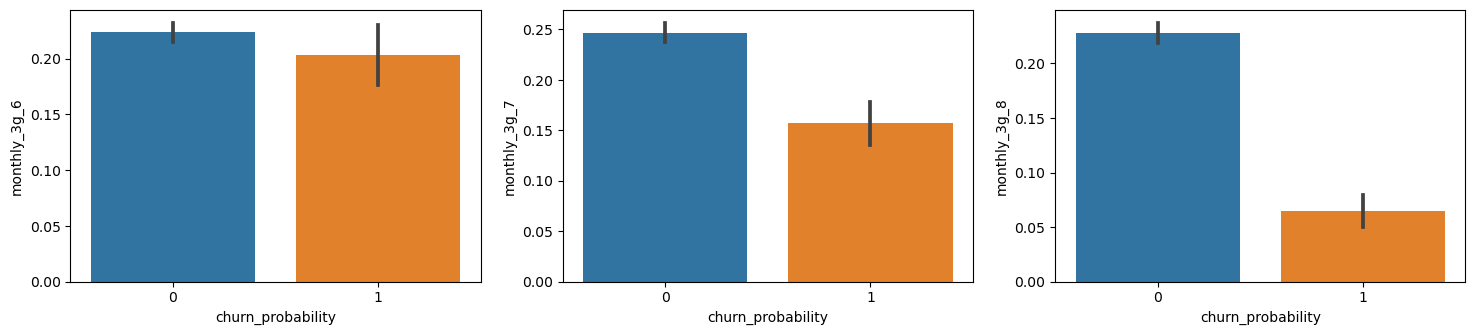

In [49]:
bivariate(hvc_telecom_churn_data,'monthly_3g_6','monthly_3g_7','monthly_3g_8')


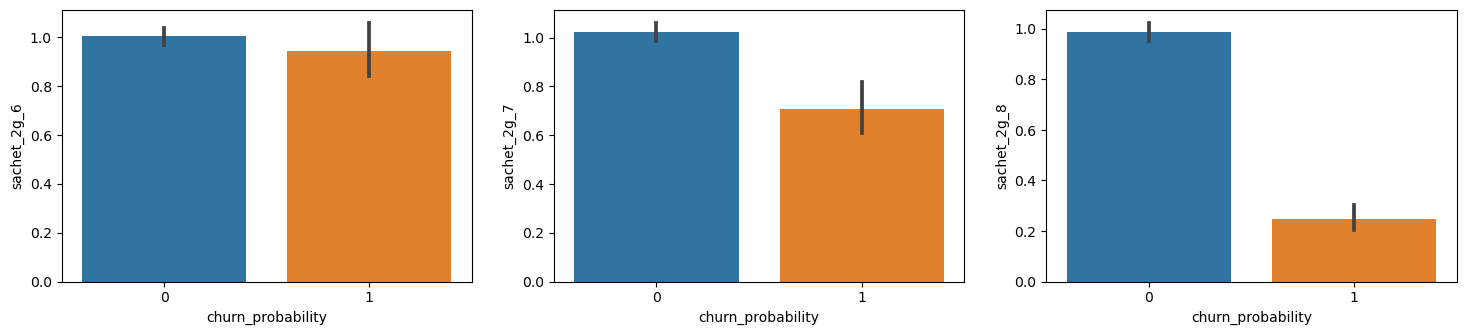

In [50]:
bivariate(hvc_telecom_churn_data,'sachet_2g_6','sachet_2g_7','sachet_2g_8')


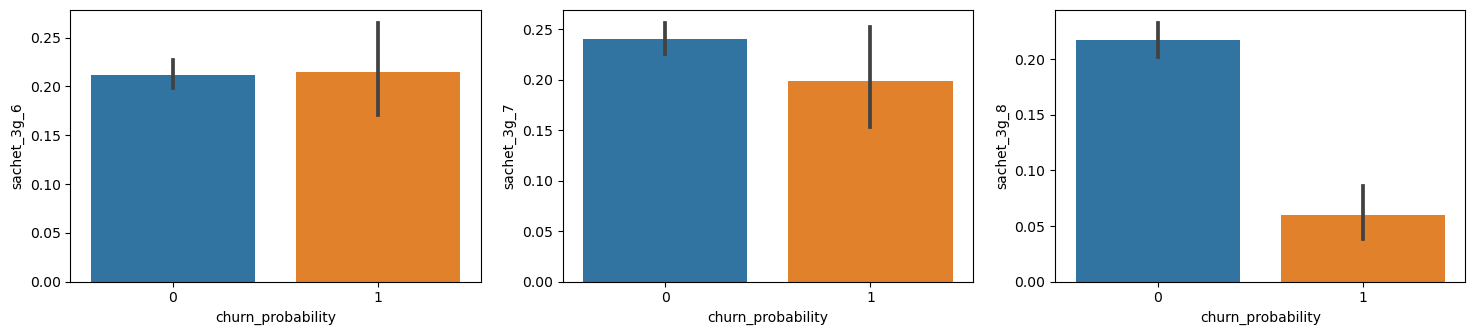

In [51]:
bivariate(hvc_telecom_churn_data,'sachet_3g_6','sachet_3g_7','sachet_3g_8')

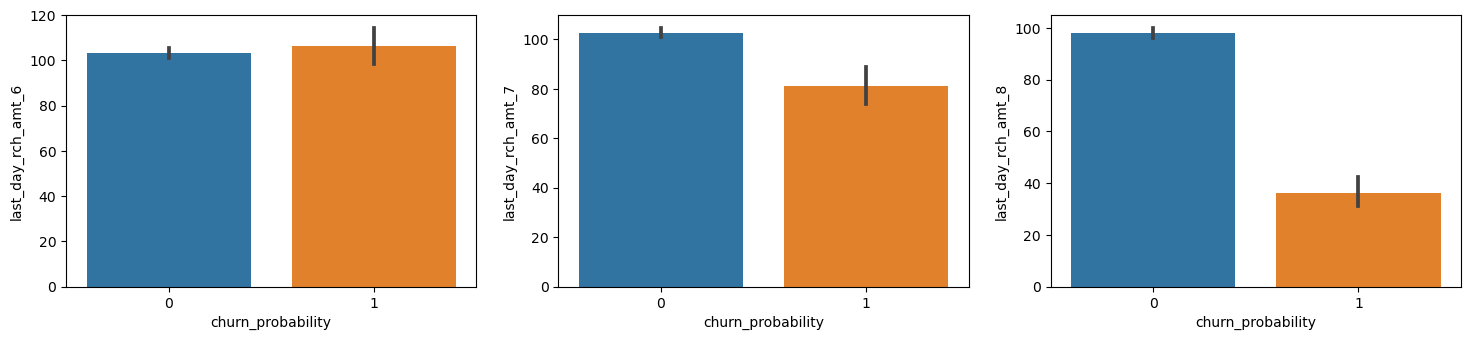

In [52]:
bivariate(hvc_telecom_churn_data,'last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8')

## Modelling

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x=hvc_telecom_churn_data.drop('churn_probability',axis=1)
y=hvc_telecom_churn_data['churn_probability']

# defining a normalisation function 
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                                                                          
# applying normalize ( ) to all columns 
x = x.apply(normalize) 
x.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_av_rech_data_amt_6,total_av_rech_data_amt_7,total_av_rech_num_6,total_av_rech_num_7,total_av_rech_num_6_7,loc_og_mou_diff,total_og_mou_diff,total_rech_amt_diff,total_rech_data_diff
4,0.083342,0.038915,0.030368,0.002885,0.000592,0.000570,0.006815,0.005410,0.000687,0.020526,0.0,0.0,0.004167,0.0,0.0,0.001580,0.000653,0.000570,0.007822,0.004362,0.000929,0.019414,0.001509,0.008516,0.0,0.017289,0.0,0.005535,0.003380,0.001428,0.000000,0.000000,0.000000,0.000523,0.000000,0.000000,0.0,0.0,0.000000,0.000516,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.01343,0.00000,0.000000,0.0,0.0,0.005927,0.005182,0.001122,0.001247,0.000243,0.000664,0.002377,0.001075,0.004197,0.004013,0.001831,0.003865,0.002889,0.001447,0.005336,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.002792,0.001258,0.004667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000,0.076471,0.072464,0.057971,0.008241,0.003372,0.002692,0.012469,0.012428,0.006743,0.006234,0.003226,0.006743,0.114754,0.129630,0.100000,0.016077,0.026367,0.016077,0.166667,0.125000,0.136364,0.0,0.029412,0.000000,0.029561,0.043757,0.034967,0.037994,0.039231,0.019201,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.166667,0.125000,0.136364,0.0,0.0,0.0000,0.0,0.030303,0.00000,0.112775,0.000000,0.000000,0.000000,0.022154,0.004418,0.026181,0.005590,0.011671,0.411100,0.359125,0.322102,0.412587
12,0.089985,0.046319,0.038790,0.033139,0.013277,0.003997,0.068399,0.103338,0.046007,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.001062,0.000370,0.009370,0.003057,0.010328,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.004135,0.002839,0.005003,0.033185,0.012349,0.004865,0.063497,0.107811,0.042522,0.0,0.0,0.000000,0.091596,0.099862,0.045220,0.0,0.0,0.0,0.000000,0.00000,0.00000,0.000000,0.0,0.0,0.076488,0.100925,0.048950,0.000000,0.000093,0.000265,0.006051,0.006377,0.005052,0.000000,0.000000,0.000000,0.003613,0.004053,0.004624,0.000076,0.0,0.000000,0.002028,0.00249,0.000854,0.00000,0.000

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42, train_size=0.7, test_size=0.3)

In [56]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(14685, 148)
(6294, 148)
(14685,)
(6294,)


## Scaling 

In [57]:
# from sklearn.preprocessing import MinMaxScaler

In [58]:
# scaler=MinMaxScaler()

In [59]:
# x_train=scaler.fit_transform(x_train)
# x_train

## PCA 

In [60]:
from sklearn.decomposition import PCA

In [61]:
pca=PCA(random_state=42)

In [62]:
pca.fit(x_train)

PCA(random_state=42)

In [63]:
pca.components_

array([[ 1.06895102e-03,  1.71004725e-03, -1.55591347e-03, ...,
        -8.80134892e-03, -4.59080676e-03, -3.89998038e-03],
       [ 2.59878106e-02,  2.41982499e-02,  2.14367372e-02, ...,
        -1.57250309e-02, -6.75427797e-03,  1.21365306e-02],
       [ 3.06204870e-02,  2.90361937e-02,  3.13185105e-02, ...,
         3.52193049e-03,  5.39614236e-03,  1.27875354e-02],
       ...,
       [-0.00000000e+00,  1.68325076e-15, -1.19952805e-15, ...,
        -1.39693042e-02,  7.92776085e-02,  1.51522329e-02],
       [-0.00000000e+00, -8.88069699e-17, -7.39857509e-16, ...,
         9.11952660e-03,  2.48869190e-01,  5.42879463e-02],
       [-0.00000000e+00, -3.79796021e-16,  1.82543864e-16, ...,
         4.82581525e-03, -1.80450329e-01,  5.15720432e-02]])

In [64]:
pca.explained_variance_ratio_

array([1.81565817e-01, 1.36721732e-01, 7.66396652e-02, 6.80925576e-02,
       6.42419868e-02, 5.12538325e-02, 4.13591333e-02, 2.67375331e-02,
       2.46936043e-02, 2.20338905e-02, 2.13159930e-02, 1.59148721e-02,
       1.54691243e-02, 1.43739346e-02, 1.38153647e-02, 1.33107675e-02,
       1.18662619e-02, 1.10326815e-02, 9.95587856e-03, 9.92343461e-03,
       8.13551258e-03, 7.95396635e-03, 7.57435698e-03, 7.27317968e-03,
       7.05731371e-03, 6.85426067e-03, 6.55666280e-03, 5.96336660e-03,
       5.46590985e-03, 5.40506691e-03, 5.19807652e-03, 4.96108001e-03,
       4.31717621e-03, 4.15572630e-03, 3.95572464e-03, 3.75458044e-03,
       3.58510222e-03, 3.43277511e-03, 3.13362288e-03, 3.02878082e-03,
       2.94406930e-03, 2.68162805e-03, 2.47199158e-03, 2.45719096e-03,
       2.38459724e-03, 2.22567539e-03, 2.12953496e-03, 2.05773090e-03,
       2.00573394e-03, 1.80977201e-03, 1.77988519e-03, 1.73637759e-03,
       1.66872346e-03, 1.61674309e-03, 1.54167852e-03, 1.43180684e-03,
      

In [65]:
var_sum=np.cumsum(pca.explained_variance_ratio_)

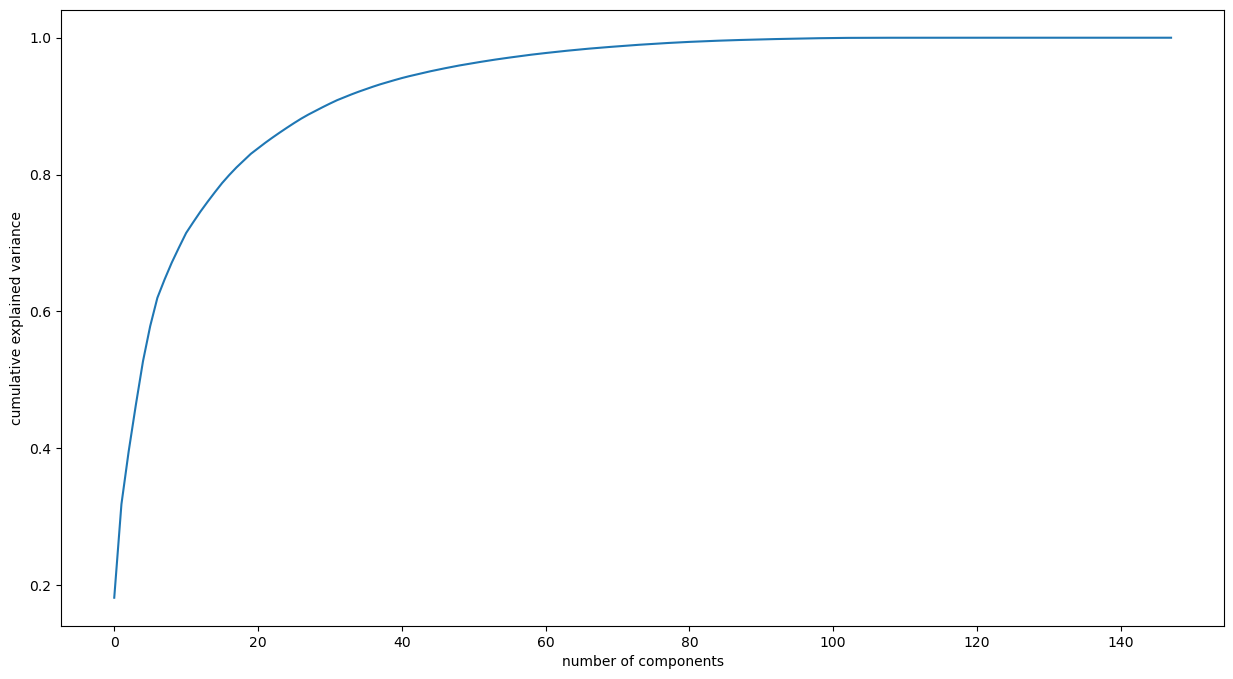

In [66]:

%matplotlib inline
fig = plt.figure(figsize = (15,8))
plt.plot(var_sum)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [67]:
from sklearn.decomposition import IncrementalPCA

In [68]:
final_pca=IncrementalPCA(n_components=35)

In [69]:
df_train_pca=final_pca.fit_transform(x_train)

In [70]:
df_train_pca.shape

(14685, 35)

In [71]:
corrmat=np.corrcoef(df_train_pca.transpose())

In [72]:
corrmat.shape

(35, 35)

<Axes: >

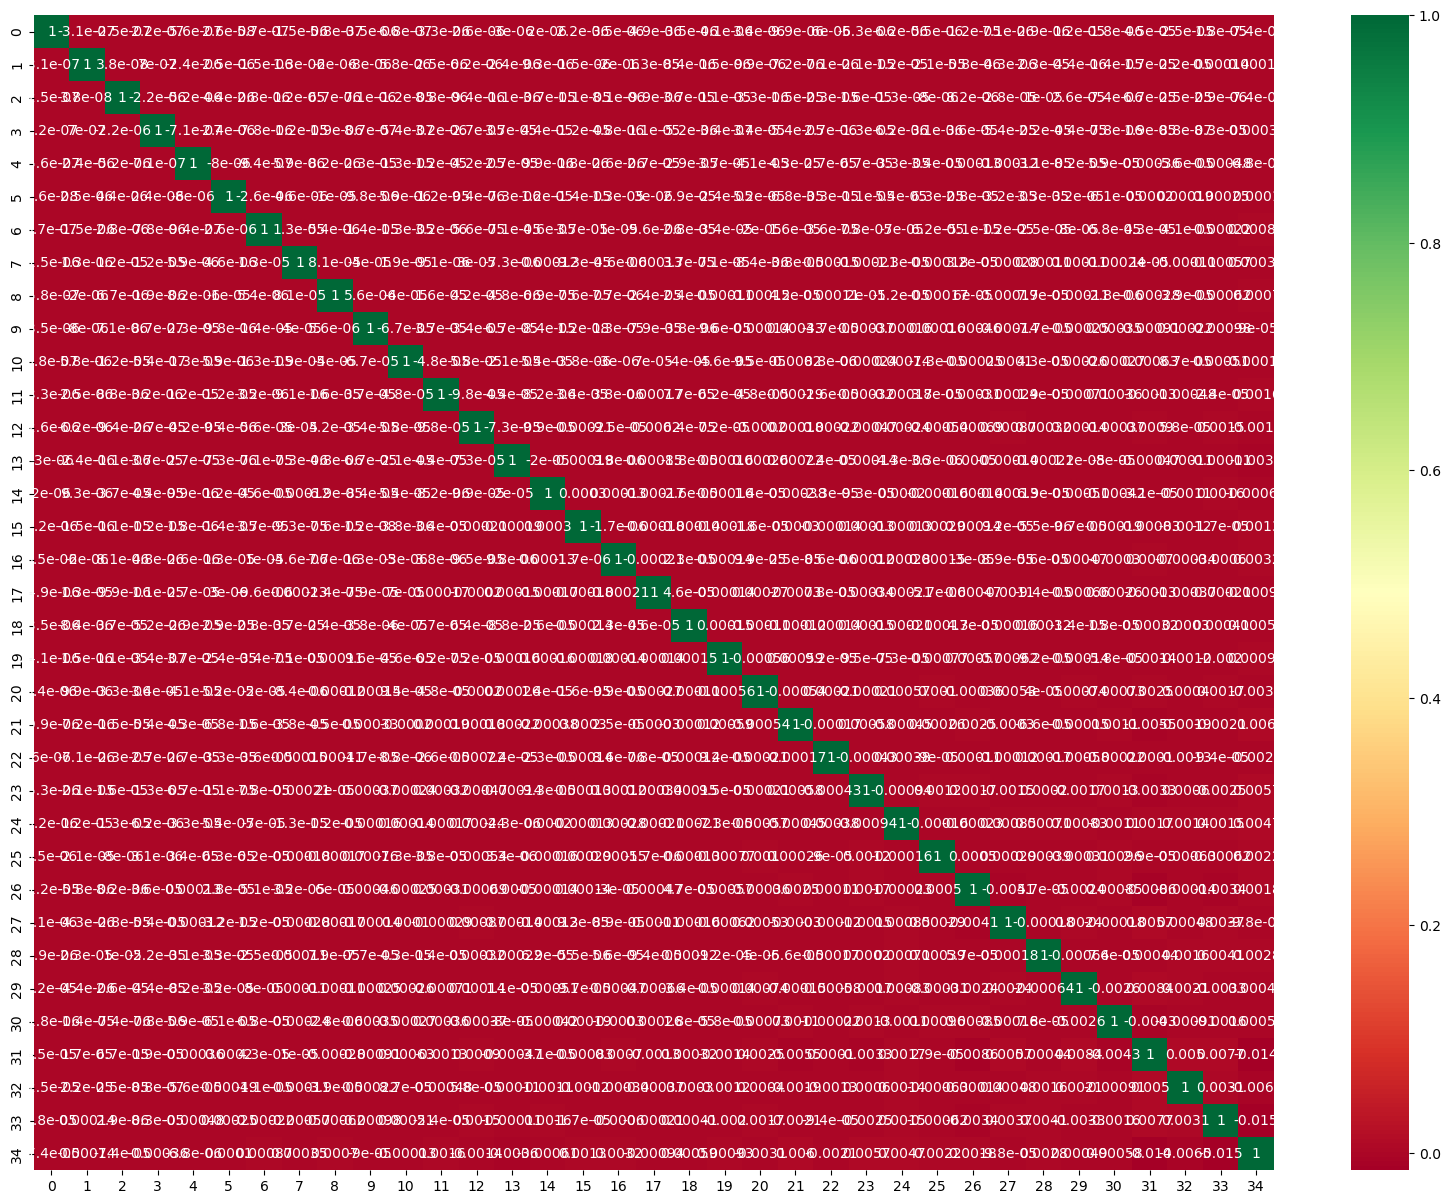

In [73]:
plt.figure(figsize=[20,15])
sns.heatmap(corrmat,cmap='RdYlGn', annot=True)

In [74]:
df_test_pca = final_pca.transform(x_test)
df_test_pca.shape

(6294, 35)

## Applying logistic regression on the data on our Principal components

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
learner_pca=LogisticRegression(class_weight='balanced')

In [77]:
model_pca=learner_pca.fit(df_train_pca,y_train)

In [78]:
pred_prob_test=model_pca.predict_proba(df_test_pca)

In [79]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [80]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_prob_test[:,1]))

'0.87'

In [81]:
#Making prediction on the test data
pred_test = model_pca.predict_proba(df_test_pca)
y_pred = model_pca.predict(df_test_pca)

In [82]:
# print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[4551 1210]
 [  97  436]]
0.792341912932952


In [83]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

## ROC Curve 

In [84]:

#ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

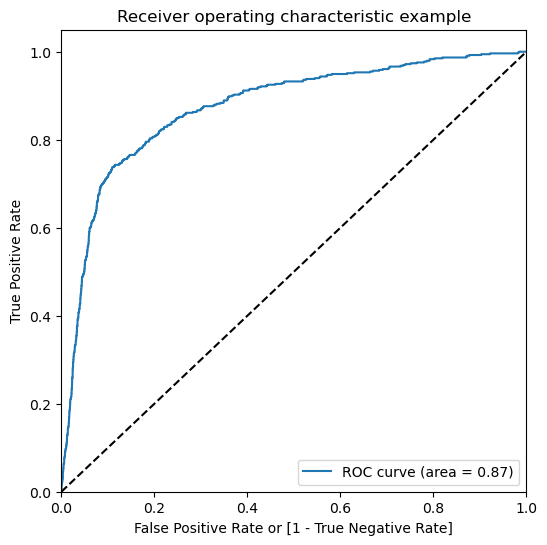

(array([0.        , 0.        , 0.        , ..., 0.99965284, 0.99982642,
        1.        ]),
 array([0.        , 0.00187617, 0.00375235, ..., 1.        , 1.        ,
        1.        ]),
 array([           inf, 9.95352412e-01, 9.95093204e-01, ...,
        1.62478373e-06, 1.90827350e-07, 1.44611984e-07]))

In [85]:
draw_roc(y_pred_final.churn_probability, y_pred_final.churn_prob)

In [86]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn_probability,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.742454,1,1,1,1,1,1,1,1,0,0
1,0,0.188059,1,1,0,0,0,0,0,0,0,0
2,0,0.040307,1,0,0,0,0,0,0,0,0,0
3,0,0.048792,1,0,0,0,0,0,0,0,0,0
4,0,0.039241,1,0,0,0,0,0,0,0,0,0


In [87]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn_probability, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.084684  0.000000  1.000000
0.1   0.1  0.355577  0.299601  0.960600
0.2   0.2  0.503813  0.463635  0.938086
0.3   0.3  0.623292  0.596598  0.911820
0.4   0.4  0.722911  0.709946  0.863039
0.5   0.5  0.792342  0.789967  0.818011
0.6   0.6  0.858595  0.868426  0.752345
0.7   0.7  0.899269  0.919979  0.675422
0.8   0.8  0.915157  0.958167  0.450281
0.9   0.9  0.914522  0.987329  0.127580


<Axes: xlabel='prob'>

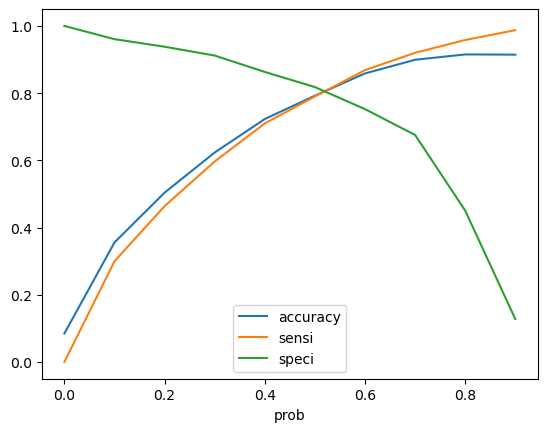

In [88]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

So from the figure we can see that the besttreshold value is at 0.51

In [89]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.49 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.49 else 0)
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn_probability, y_pred_final.pred_churn )
confusion

array([[4505, 1256],
       [  94,  439]], dtype=int64)

In [90]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score on test data: ', accuracy_score(y_test,y_pred))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score on test data:  0.792341912932952
Sensitivity:  0.8236397748592871
Specificity:  0.7819822947404964
false postive rate:  0.21801770525950356
positive predictive value:  0.25899705014749264
Negative predictive value:  0.979560774081322
Misclassification Rate:  0.21448999046711154


## Decision Tree Classifier

In [91]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
dt_base = DecisionTreeClassifier(class_weight='balanced',random_state=42, max_depth=5)

In [93]:
dt_base.fit(df_train_pca, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [94]:
y_train_pred = dt_base.predict(df_train_pca)
y_test_pred = dt_base.predict(df_test_pca)

In [95]:
from sklearn.metrics import classification_report

In [96]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.76      0.85      5761
           1       0.22      0.74      0.34       533

    accuracy                           0.76      6294
   macro avg       0.60      0.75      0.60      6294
weighted avg       0.91      0.76      0.81      6294



In [97]:
confusion_tree = confusion_matrix(y_test,y_test_pred)
TP = confusion_tree[1,1] # true positive 
TN = confusion_tree[0,0] # true negatives
FP = confusion_tree[0,1] # false positives
FN = confusion_tree[1,0] # false negatives

print('Acuracy Score', accuracy_score(y_test,y_pred))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Acuracy Score 0.792341912932952
Sensitivity:  0.7448405253283302
Specificity:  0.7616733206040618
false postive rate:  0.2383266793959382
positive predictive value:  0.22429378531073446
Negative predictive value:  0.9699381078691424
Misclassification Rate:  0.23975214489990468


### Hyper Parameter Tuning 

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
dt = DecisionTreeClassifier(criterion='gini',class_weight='balanced',random_state=42)

In [100]:
params = {
    "max_depth": [2,3,5,10,20,30,40,50],
    "min_samples_leaf": [5,10,20,30,40,50,60,70,80,90,100,200,300,400,500]
}

In [101]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=5,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [102]:
%%time
grid_search.fit(df_train_pca, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
CPU times: total: 8.09 s
Wall time: 3min 34s


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [5, 10, 20, 30, 40, 50, 60, 70, 80,
                                              90, 100, 200, 300, 400, 500]},
             scoring='accuracy', verbose=1)

In [103]:
grid_search.best_score_

0.8476676881171263

In [104]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(class_weight='balanced', max_depth=30,
                       min_samples_leaf=5, random_state=42)

In [105]:
# model with optimal hyperparameters
dt_gini = DecisionTreeClassifier(criterion = 'gini',class_weight='balanced',
                                  random_state = 42,
                                  max_depth=30, 
                                  min_samples_leaf=5,
                                  min_samples_split=2)
dt_gini.fit(df_train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=30,
                       min_samples_leaf=5, random_state=42)

In [106]:
# predict
y_test_pred = dt_gini.predict(df_test_pca)

In [107]:
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))
print('accuracy_score:  ',accuracy_score(y_test,y_test_pred))


              precision    recall  f1-score   support

           0       0.95      0.87      0.91      5761
           1       0.25      0.46      0.33       533

    accuracy                           0.84      6294
   macro avg       0.60      0.67      0.62      6294
weighted avg       0.89      0.84      0.86      6294

[[5035  726]
 [ 287  246]]
accuracy_score:   0.8390530664124564


In [108]:
# Confusion Matrix
confusion_rf_hyper=confusion_matrix(y_test,y_test_pred)
confusion_rf_hyper

array([[5035,  726],
       [ 287,  246]], dtype=int64)

In [109]:
TN = confusion_rf_hyper[0,0] # true positive 
TP = confusion_rf_hyper[1,1] # true negatives
FP = confusion_rf_hyper[0,1] # false positives
FN = confusion_rf_hyper[1,0] # false negatives

print('Accuracy Score:  ',accuracy_score(y_test,y_test_pred))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score:   0.8390530664124564
Sensitivity:  0.46153846153846156
Specificity:  0.8739802117687901
false postive rate:  0.12601978823120985
positive predictive value:  0.25308641975308643
Negative predictive value:  0.9460729049229613
Misclassification Rate:  0.1609469335875437


## Random Forest 

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [112]:
%%time
rf.fit(df_train_pca, y_train)

CPU times: total: 1.56 s
Wall time: 1.61 s


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [113]:
y_train_pred = rf.predict(df_train_pca)
y_test_pred = rf.predict(df_test_pca)

In [114]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5761
           1       0.00      0.00      0.00       533

    accuracy                           0.92      6294
   macro avg       0.46      0.50      0.48      6294
weighted avg       0.84      0.92      0.87      6294



In [115]:
confusion_tree = confusion_matrix(y_test,y_test_pred)
TP = confusion_tree[1,1] # true positive 
TN = confusion_tree[0,0] # true negatives
FP = confusion_tree[0,1] # false positives
FN = confusion_tree[1,0] # false negatives

print('Acuracy Score', accuracy_score(y_test,y_pred))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Acuracy Score 0.792341912932952
Sensitivity:  0.0
Specificity:  1.0
false postive rate:  0.0
positive predictive value:  nan
Negative predictive value:  0.9153161741340959
Misclassification Rate:  0.08468382586590403


### Hyper Parameter Tuning 

In [116]:
rf = RandomForestClassifier(criterion='gini',class_weight='balanced',random_state=42, n_jobs=-1)

In [117]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [118]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [119]:
%%time
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
CPU times: total: 1min
Wall time: 10min 6s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [120]:
grid_search.best_score_

0.9173306546808317

In [121]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=5, n_jobs=-1, random_state=42)

In [122]:
rfc = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                             max_depth=20,
                             min_samples_leaf=5, 
                             min_samples_split=2,
                             n_estimators=100)

In [123]:
# fit
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=5)

In [124]:
# predict
y_pred_default = rfc.predict(df_test_pca)

In [125]:

print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('accuracy_score:  ',accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      5761
           1       0.52      0.41      0.45       533

    accuracy                           0.92      6294
   macro avg       0.73      0.69      0.71      6294
weighted avg       0.91      0.92      0.91      6294

[[5560  201]
 [ 317  216]]
accuracy_score:   0.9176993962503972


In [126]:
# Confusion Matrix
confusion_rf_hyper=confusion_matrix(y_test,y_pred_default)
confusion_rf_hyper

array([[5560,  201],
       [ 317,  216]], dtype=int64)

In [127]:
TN = confusion_rf_hyper[0,0] # true positive 
TP = confusion_rf_hyper[1,1] # true negatives
FP = confusion_rf_hyper[0,1] # false positives
FN = confusion_rf_hyper[1,0] # false negatives

print('Accuracy Score:  ',accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score:   0.9176993962503972
Sensitivity:  0.4052532833020638
Specificity:  0.9651102239194584
false postive rate:  0.03488977608054157
positive predictive value:  0.5179856115107914
Negative predictive value:  0.946060915433044
Misclassification Rate:  0.0823006037496028


### We can observe that RFC has the highest accuracy

In [154]:
test_data = pd.read_csv('test.csv')

In [155]:
test_data.shape

(30000, 171)

In [156]:
test_data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [157]:
ids = test_data['id']

In [177]:
ids.info()

<class 'pandas.core.series.Series'>
RangeIndex: 30000 entries, 0 to 29999
Series name: id
Non-Null Count  Dtype
--------------  -----
30000 non-null  int64
dtypes: int64(1)
memory usage: 234.5 KB


In [158]:
print(test_data.shape)

(30000, 171)


In [160]:

# Apply the same zero imputation for specific columns
zero_impute_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
                    'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6',
                    'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']

test_data[zero_impute_cols] = test_data[zero_impute_cols].apply(lambda x: x.fillna(0))

date_id_col=[]
for i in test_data.columns:
    if ('date' in i) or ('id' in i):
        date_id_col.append(i)
test_data.drop(columns=date_id_col,inplace=True)

# Drop columns that were removed in training data
test_data.drop(columns=[ 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8'], inplace=True)

# Drop columns with single values
test_data.drop(columns=col_single_value, inplace=True)

# Impute missing values in remaining columns with median
missed_cols = test_data.columns[test_data.isnull().sum() > 0]
for col in missed_cols:
    test_data[col].fillna((test_data[col].median()), inplace=True)

# Calculate new features based on the high-value customer logic
test_data['total_av_rech_data_amt_6'] = (test_data['count_rech_2g_6'] + test_data['count_rech_3g_6']) * test_data['av_rech_amt_data_6']
test_data['total_av_rech_data_amt_7'] = (test_data['count_rech_3g_7'] + test_data['count_rech_3g_7']) * test_data['av_rech_amt_data_7']

test_data['total_av_rech_num_6'] = (test_data['total_rech_amt_6'] + test_data['total_av_rech_data_amt_6'])
test_data['total_av_rech_num_7'] = (test_data['total_rech_amt_7'] + test_data['total_av_rech_data_amt_7'])
test_data['total_av_rech_num_6_7'] = (test_data['total_av_rech_num_6'] + test_data['total_av_rech_num_7']) / 2

# Drop columns that were removed in training data
#test_data.drop(columns=['total_rech_num_6', 'total_rech_num_7', 'total_av_rech_data_amt_6', 'total_av_rech_data_amt_7',
                         #'total_av_rech_num_6', 'total_av_rech_num_7'], inplace=True)

# Filter high-value customers based on the quantile value used for training data
test_data_hvc = test_data

# Calculate additional difference features for test data
test_data_hvc['loc_og_mou_diff'] = test_data_hvc['loc_og_mou_8'] - (test_data_hvc['loc_og_mou_6'] + test_data_hvc['loc_og_mou_7']) / 2
test_data_hvc['total_og_mou_diff'] = test_data_hvc['total_og_mou_8'] - (test_data_hvc['total_og_mou_6'] + test_data_hvc['total_og_mou_7']) / 2
test_data_hvc['total_rech_amt_diff'] = test_data_hvc['total_rech_amt_8'] - (test_data_hvc['total_rech_amt_6'] + test_data_hvc['total_rech_amt_7']) / 2
test_data_hvc['total_rech_data_diff'] = test_data_hvc['total_rech_data_8'] - (test_data_hvc['total_rech_data_6'] + test_data_hvc['total_rech_data_7']) / 2




In [169]:
# applying normalize ( ) to all columns 
test_data_hvc = test_data_hvc.apply(normalize) 
test_data_hvc.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_av_rech_data_amt_6,total_av_rech_data_amt_7,total_av_rech_num_6,total_av_rech_num_7,total_av_rech_num_6_7,loc_og_mou_diff,total_og_mou_diff,total_rech_amt_diff,total_rech_data_diff
0,0.024858,0.136458,0.015477,0.004576,0.002730,0.003437,0.008641,0.003327,0.002571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004232,0.002824,0.003132,0.003833,0.002443,0.002414,0.000000,0.01135,0.000000,0.0,0.000000,0.00006,0.007301,0.005975,0.004311,0.000994,0.000000,0.000309,0.006536,0.000827,0.001971,0.0,0.0,0.0,0.007033,0.000702,0.002084,0.0,0.0,0.000000,0.000000,0.000000,0.000022,0.000000,0.0,0.0,0.012445,0.004610,0.004184,0.004577,0.006691,0.006298,0.002175,0.001046,0.001827,0.000155,0.000000,0.000000,0.005980,0.007356,0.005847,0.000000,0.000000,0.000000,0.000078,0.000290,0.000769,0.0,0.0,0.00000,0.000066,0.000179,0.000729,0.006103,0.007444,0.006053,0.080119,0.01594,0.0626,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.016287,0.045455,0.020408,0.005568,0.004737,0.004286,0.015873,0.007481,0.006743,0.009677,0.007481,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.376400,0.000000,0.000000,0.000000,0.0,0.0,0.000908,0.001065,0.001487,0.454162,0.477271,0.461816,0.290541
1,0.053789,0.166005,0.037188,0.010874,0.005561,0.002951,0.068128,0.064325,0.029152,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012845,0.005753,0.002951,0.100134,0.134197,0.108938,0.000498,0.00000,0.000000,0.0,0.000000,0.00000,0.093342,0.085431,0.058170,0.000000,0.000000,0.000000,0.000000,0.002559,0.001318,0.0,0.0,0.0,0.000000,0.002172,0.001293,0.0,0.0,0.000958,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.074431,0.058341,0.030010,0.003016,0.004801,0.000748,0.034128,0.027865,0.035439,0.000888,0.000000,0.000000,0.026625,0.026039,0.034782,0.000000,0.000000,0.000000,0.000000,0.003494,0.000000,0.0,0.0,0.00000,0.000000,0.002156,0.000000,0.043342,0.058038,0.047016,0.00000

In [170]:
test_data_hvc.shape

(30000, 148)

In [171]:
final_test_data = final_pca.transform(test_data_hvc)
final_test_data.shape

(30000, 35)

In [173]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [178]:
df = pd.DataFrame({'id': ids, 'churn_probability': predictions})

df.to_csv('predictions.csv', index=False)

# Optionally, you can display the DataFrame
print(df.head())

      id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  0
3  70002                  0
4  70003                  0


In [184]:
predictions_pca = model_pca.predict(final_test_data)

In [185]:
predictions_pca

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [186]:
df_pca  = pd.DataFrame({'id': ids, 'churn_probability': predictions_pca})

df_pca.to_csv('predictions_pca.csv', index=False)

# Optionally, you can display the DataFrame
print(df_pca .head())

      id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  0
3  70002                  0
4  70003                  0


In [188]:
predictions_dtc = dt_gini.predict(final_test_data)

In [189]:
predictions_dtc

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [190]:
df_dtc  = pd.DataFrame({'id': ids, 'churn_probability': predictions_dtc})

df_pca.to_csv('predictions_dtc.csv', index=False)

# Optionally, you can display the DataFrame
print(df_dtc .head())

      id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  1
3  70002                  0
4  70003                  0
